<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week6/EvidenceBasedInvesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the Monte Carlo Simulation notebook developed by Matt Macarty


In [0]:
# Install base libraries

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
from babel.numbers import format_currency

plots.style.use('fivethirtyeight')


In [42]:
# OBTAIN - Build Base Investment and Calculate Growth

pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(format_currency(ending, 'USD'))
    pv = ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [43]:
# OBTAIN - Using random variation based on market history - 7.10% - S&P 500


pv = 10000
expected_return = .071
volatility = .10
time_horizon = 30
annual_addition = 10000

#print("\tEnding Value".rjust(9))
print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(format_currency(fv, 'USD')))
    #print(format_currency(fv, 'USD') )
    pv = fv

	Return     		Ending Value
	0.0317               	$20,317.41
	0.0557               	$31,449.76
	0.1098               	$44,903.96
	-0.0765               	$51,470.68
	0.1252               	$67,912.60
	0.1107               	$85,432.10
	0.081               	$102,351.21
	0.0399               	$116,434.46
	0.0235               	$129,170.87
	0.1704               	$161,175.75
	0.0769               	$183,576.78
	-0.0793               	$179,016.29
	0.1084               	$208,418.07
	0.0507               	$228,975.08
	0.0924               	$260,139.74
	-0.0668               	$252,770.97
	0.1886               	$310,432.06
	0.309               	$416,353.55
	-0.0343               	$412,065.00
	0.0973               	$462,145.25
	-0.0385               	$454,360.88
	0.1247               	$521,017.22
	0.3162               	$695,753.53
	0.0385               	$732,554.17
	0.1957               	$885,940.07
	0.0612               	$950,203.43
	0.0009               	$961,059.19
	-0.0252               	$946,83

In [0]:
# MODEL - Simulate Multiple Outcomes

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .071 # Return of S&P 500 - 10 year avg
    volatility = .15 # Frequency and severity that market price fluctuates
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [63]:
# EXPLORE  - Look at sample of annual ending values

first_five = list(range(5))
sim[first_five]


,0,1,2,3,4
0,20407.23,17960.70,24002.46,20565.14,21473.30
1,35225.70,24836.79,36600.52,29821.70,37642.27
2,58419.08,33679.82,47807.54,44324.56,49792.33
3,74238.23,52401.99,64244.28,56416.85,49542.71
4,101760.84,57808.14,76962.22,69670.41,64525.06
5,139918.18,61642.47,86157.13,80776.32,77541.23
6,151437.49,77976.97,121870.84,90095.73,112380.27
7,179252.50,84190.36,127736.26,99131.25,123527.12
8,194995.77,106074.04,167514.36,128828.83,141647.77
9,118954.55,142618.28,166207.00,127626.96,164304.04


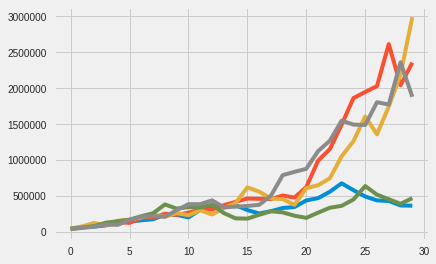

In [47]:
# EXPLORE - Plot simulated portfolios

plots.plot(sim[first_five])


In [48]:
# EXPLORE - Look at summary statistics


print("Count:", len(sim.loc[29]))
print("Mean: ", format_currency(np.mean(sim.loc[29]), 'USD'))
print("SD: ",format_currency(np.std(sim.loc[29]),'USD'))
print("Max: ",format_currency(np.max(sim.loc[29]), 'USD'))
print("Min: ", format_currency(np.min(sim.loc[29]), 'USD'))

Count: 10000
Mean:  $1,953,079.64
SD:  $1,766,764.48
Max:  $24,057,259.34
Min:  $111,962.50


In [64]:
# EXPLORE - Look at summary statistics with Pandas

ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.042977e+06
std      6.336589e+05
min      1.308136e+05
25%      6.175947e+05
50%      8.841491e+05
75%      1.290344e+06
max      7.710860e+06
Name: 29, dtype: float64

(array([ 10.,  56., 144., 256., 290., 352., 326., 390., 357., 342., 288.,
        278., 244., 195., 169., 174., 135., 109., 127.,  83.,  83.,  57.,
         62.,  67.,  41.,  55.,  44.,  22.,  33.,  28.,  17.,  17.,  15.,
          6.,  12.,  18.,  12.,  10.,   7.,  10.,   2.,   5.,   7.,   9.,
          3.,   4.,   2.,   2.,   4.,   1.,   2.,   1.,   2.,   0.,   1.,
          0.,   1.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,   2.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([ 130813.64  ,  206614.1001,  282414.5602,  358215.0203,
         434015.4804,  509815.9405,  585616.4006,  661416.8607,
         737217.3208,  813017.7809,  888818.241 ,  964618.7011,
        1040419.1612, 1116219.6213, 1192020.0814, 1267820.5415,
        1343621.0016, 1419421.4617, 1495221.9218, 1571022.3819,

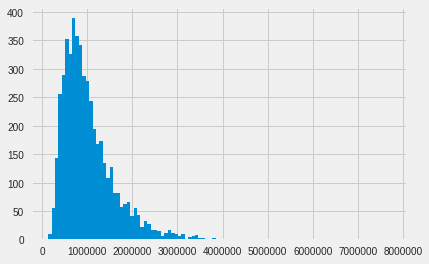

In [65]:
# EXPLORE - Look at histogram

plots.hist(ending_values, bins=100)


In [66]:
# ANALYZE - Probability of seeing greater than a specific value?

len(ending_values[ending_values>1000000]) / len(ending_values)


0.4112

In [67]:
# ANALYZE - Tableof all percentiles


p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(format_currency(p_tiles[p], 'USD')))

       5%-ile:  $374,731.33
      10%-ile:  $443,163.37
      15%-ile:  $509,044.20
      25%-ile:  $617,594.71
      75%-ile:  $1,290,343.77
      85%-ile:  $1,575,486.40
      90%-ile:  $1,835,087.95
      95%-ile:  $2,216,578.67
